# Transfer Learning using VGG16 on a CiFAR10 Multi-class Classification Problem

In [ ]:
import tensorflow.keras as K


## Preprocess Data Function
The `preprocess_data` function takes two arguments: `X` for input data and `Y` for labels. Here's what it does:
- Converts the input data to `float32`.
- Preprocesses the input data using the VGG16 preprocessing function from Keras.
- Converts the labels to one-hot encoding using the `to_categorical` function from Keras.

This function is useful for preparing the data before the neural network model.


In [4]:

def preprocess_data(X, Y):
        X = X.astype('float32')
        X_p = K.applications.vgg16.preprocess_input(X)
        Y_p = K.utils.to_categorical(Y, 10)
        return(X_p, Y_p)

## VGG16 Model Initialization
The VGG16 model is initialized with the following configurations:
- `include_top=False`: This excludes the top (classification) layers of the VGG16 model, allowing it to be used as a feature extractor.
- `weights='imagenet'`: This specifies that the pre-trained weights from the ImageNet dataset should be used.
- `pooling='avg'`: This sets the global average pooling as the output of the VGG16 model.

The resulting base model will be used to extract features from the preprocessed images.

In [5]:
if __name__ == "__main__":
    (Xt, Yt), (X, Y) = K.datasets.cifar10.load_data()
    X_p, Y_p = preprocess_data(Xt, Yt)
    Xv_p, Yv_p = preprocess_data(X, Y)
    base_model = K.applications.vgg16.VGG16(include_top=False,
                                            weights='imagenet',
                                            pooling='avg'
                                            )

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


## Plotting a 1x3 grid of images from the CIFAR-10 dataset with their corresponding labels.

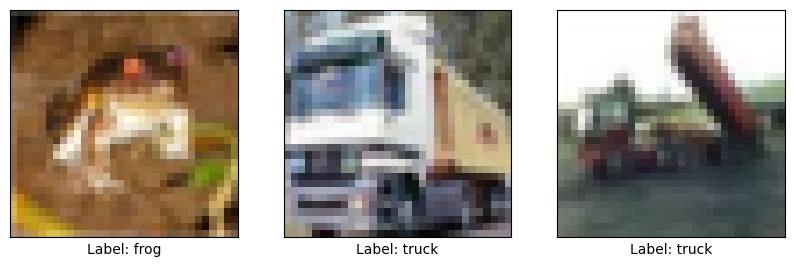

In [36]:
# Plot 3x1 grid of images with labels
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(Xt[i], cmap=plt.cm.binary)
    label = class_names[Yt[i][0]]
    plt.xlabel(f"Label: {label}")

plt.show()

# Model Definition

This cell defines a neural network model using Keras Sequential API. The model architecture consists of several layers:

1. **UpSampling2D Layer**:
   - The `UpSampling2D` layer is added to upsample the input data. This layer increases the spatial dimensions of the data.
   
2. **Base Model (VGG16)**:
   - The `base_model` (previously initialized VGG16 model) is added as a layer in the model. This allows the model to utilize the pre-trained VGG16 model as a feature extractor.

3. **Flatten Layer**:
   - The `Flatten` layer is added to flatten the output of the VGG16 base model into a one-dimensional tensor, preparing it for the fully connected layers.

4. **Dense Layers**:
   - Two `Dense` layers with 512 and 256 units, respectively, are added with ReLU activation functions. These layers are responsible for learning high-level features from the flattened input.
   
5. **Dropout Layers**:
   - Two `Dropout` layers with a dropout rate of 0.2 are added to prevent overfitting by randomly dropping a fraction of input units during training.

6. **Output Layer**:
   - The final `Dense` layer with 10 units and a softmax activation function is added to produce the output probabilities for each class in the CIFAR-10 dataset.




In [6]:
    model= K.Sequential()
    model.add(K.layers.UpSampling2D())
    model.add(base_model)
    model.add(K.layers.Flatten())
    model.add(K.layers.Dense(512, activation=('relu'))) 
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(256, activation=('relu')))
    model.add(K.layers.Dropout(0.2))
    model.add(K.layers.Dense(10, activation=('softmax')))
    

# Learning Rate Decay Function
Computes the learning rate for the given epoch using a decay schedule. In this formula, the learning rate starts at 0.001 and decreases over time as the epoch increases.

In [7]:
def decay(epoch):
        """ This method create the alpha"""
        return 0.001 / (1 + 1 * 30)


# Callback Initialization

This cell initializes a list named `callback` to store callback functions that will be used during the training of a neural network model.

## LearningRateScheduler Callback
- The LearningRateScheduler callback adjusts the learning rate during training epochs based on a specified decay function. 
- It is added to the `callback` list using `append()`.
- The `decay` function defined earlier is passed as an argument to the LearningRateScheduler callback.
- The `verbose=1` argument indicates that progress updates will be printed during training.

## ModelCheckpoint Callback
- The ModelCheckpoint callback saves the model's weights to a file whenever the validation loss decreases.
- It is added to the `callback` list using `append()`.
- The filepath is set to 'cifar10.keras', which specifies the filename for saving the model weights. Additionally, `save_best_only=True` ensures that only the weights corresponding to the minimum validation loss are saved, and `mode='min'` specifies that the validation loss is being monitored for minimizing.



In [8]:
callback = []
# Add LearningRateScheduler callback
callback.append(K.callbacks.LearningRateScheduler(decay, verbose=1))

# Add ModelCheckpoint callback
callback.append(K.callbacks.ModelCheckpoint('cifar10.keras',  
                                             save_best_only=True,
                                             mode='min'
                                             ))


## Model Compilation

This cell compiles the neural network model before training. Compilation involves configuring the model for training by specifying the optimizer, loss function, and evaluation metrics.

- **Optimizer**: 'adam'
- **Loss Function**: 'categorical_crossentropy'
- **Metrics**: ['accuracy']



In [9]:
                                             
    model.compile(optimizer='adam', loss='categorical_crossentropy',
                  metrics=['accuracy'])

## Model Training

This cell trains the neural network model using the compiled configurations and the preprocessed training data `(X_p, Y_p)`.

- **Batch Size**: 128
- **Validation Data**: `(Xv_p, Yv_p)`
- **Epochs**: 10
- **Shuffle**: True
- **Callbacks**: `callback` list containing callback functions for learning rate scheduling and model checkpointing
- **Verbose**: 1 (print progress updates during training)



In [10]:
history=model.fit(x=X_p, y=Y_p,
            batch_size=128,
              validation_data=(Xv_p, Yv_p),
              epochs=10, shuffle=True,
              callbacks=callback,
              verbose=1
              )


Epoch 1: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 1/10
  2/391 ━━━━━━━━━━━━━━━━━━━━ 31s 81ms/step - accuracy: 0.0977 - loss: 18.3916   

I0000 00:00:1711476023.610003      81 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


391/391 ━━━━━━━━━━━━━━━━━━━━ 72s 122ms/step - accuracy: 0.3200 - loss: 2.5858 - val_accuracy: 0.7325 - val_loss: 0.8212 - learning_rate: 3.2258e-05

Epoch 2: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.7476 - loss: 0.7648 - val_accuracy: 0.8193 - val_loss: 0.5572 - learning_rate: 3.2258e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step - accuracy: 0.8486 - loss: 0.4702 - val_accuracy: 0.8578 - val_loss: 0.4459 - learning_rate: 3.2258e-05

Epoch 4: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 29s 75ms/step - accuracy: 0.8985 - loss: 0.3141 - val_accuracy: 0.8578 - val_loss: 0.4773 - learning_rate: 3.2258e-05

Epoch 5: LearningRateScheduler setting learning rate to 3.2258064516129034e-05.
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 30s 77ms/step 

### Training Metrics:
### - Accuracy: 98.28% (0.9828)
### - Loss: 0.0539
 
### Validation Metrics:
### - Accuracy: 88.67% (0.8867)
* ### - Loss: 0.5096

# Plotting train vs. test accuracy

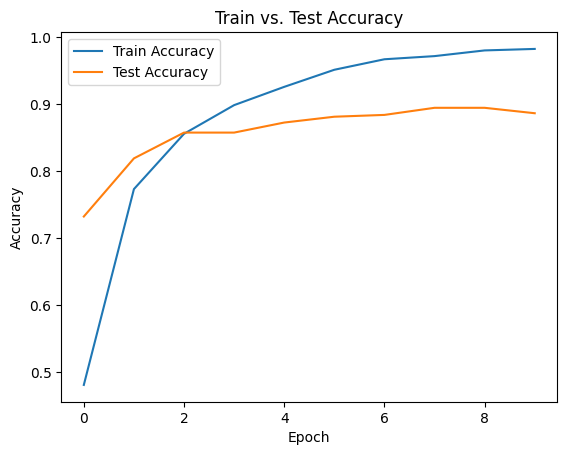

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Train vs. Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting train vs. test loss

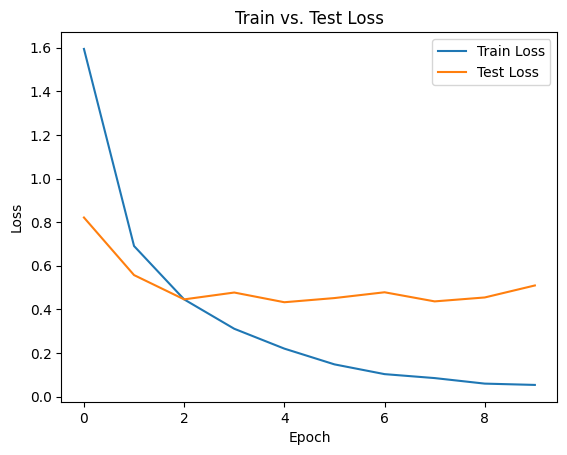

In [16]:

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Train vs. Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Visualization of Model Predictions on Validation Data


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


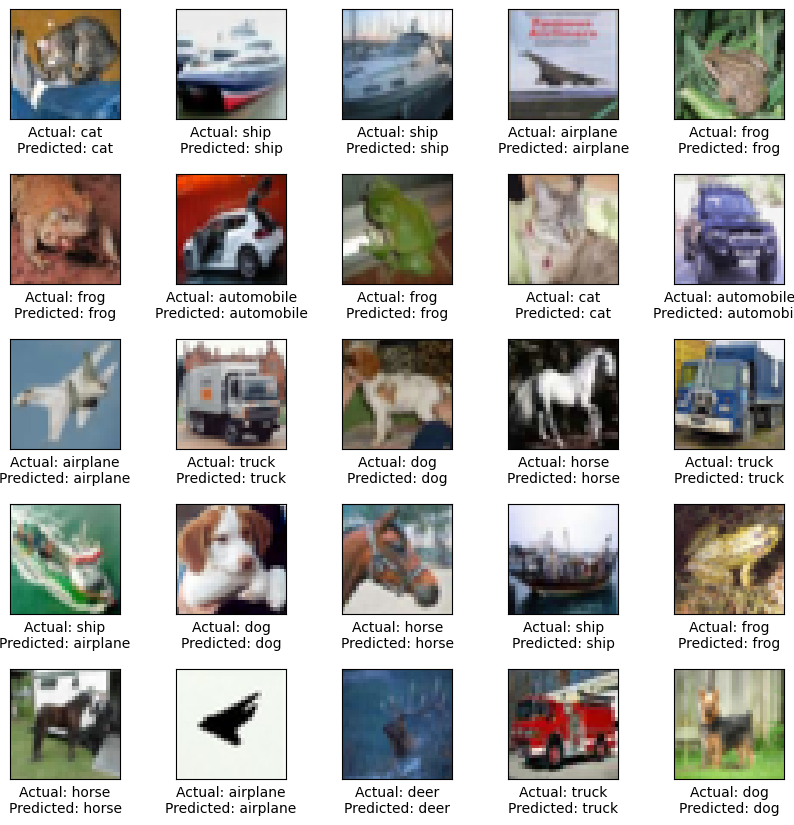

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Get model predictions
predictions = model.predict(Xv_p)
predicted_labels = np.argmax(predictions, axis=1)

# Define class labels for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plot 5x5 grid of images with labels
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X[i], cmap=plt.cm.binary)
    actual_label = class_names[Y[i][0]]
    predicted_label = class_names[predicted_labels[i]]
    plt.xlabel(f"Actual: {actual_label}\nPredicted: {predicted_label}")

# Adjust space between images
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()


# Comment: Only one of the 25 images was predicted wrong, demonstrating a high accuracy of the model.